In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import requests
#import dill
from bs4 import BeautifulSoup
#from datetime import datetime
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import XML, fromstring, tostring
# from apscheduler.schedulers.blocking import BlockingScheduler
from datetime import datetime, timedelta
import time
import os
import pandas
from ast import literal_eval


In [2]:
def getTime():
    now = datetime.now()
    current_time = now.strftime("%H_%M_%S")
    return current_time
getTime()
# my_path = os.path.abspath("Downloads/Traffic_data-master/")

'16_17_56'

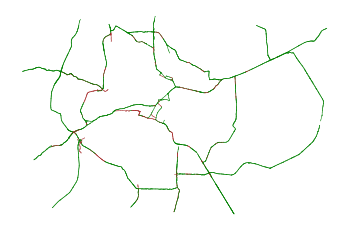

In [222]:
def fun():        
    page = requests.get('https://traffic.api.here.com/traffic/6.2/flow.xml?app_id=wvzQzqmPlU1T9tjf0YLU&app_code=b_is4SmSRfh8e0-Mr2-low&bbox=12.907945, 77.512298;13.014777, 77.693619&responseattributes=sh,fc&units=metric')
    soup = BeautifulSoup(page.text, "lxml")
    roads = soup.find_all('fi')
    a1=[]
    loc_list_hv=[]
    lats=[]
    longs=[]
    sus=[]
    ffs=[]
    c=0
    for road in roads:
        #for j in range(0,len(shps)):
        myxml = fromstring(str(road))
        fc=5
        for child in myxml:
            #print(child.tag, child.attrib)
            if('fc' in child.attrib):
                fc=int(child.attrib['fc'])
            if('cn' in child.attrib):
                cn=float(child.attrib['cn'])
            if('su' in child.attrib):
                su=float(child.attrib['su'])
            if('ff' in child.attrib):
                ff=float(child.attrib['ff'])
        if((fc<=2) and (cn>=0.7)):
            shps=road.find_all("shp")
            for j in range(0,len(shps)):
                latlong=shps[j].text.replace(',',' ').split()
                #loc_list=[]
                la=[]
                lo=[]
                su1=[]
                ff1=[] 
                for i in range(0,int(len(latlong)/2)):
                    loc_list_hv.append([float(latlong[2*i]),float(latlong[2*i+1]),float(su),float(ff)])
                    la.append(float(latlong[2*i]))
                    lo.append(float(latlong[2*i+1]))
                    su1.append(float(su))
                    ff1.append(float(ff))
                lats.append(la)
                longs.append(lo)
                sus.append(np.mean(su1))
                ffs.append(np.mean(ff1))
    fig=plt.figure()
    # plt.style.use('dark_background')
    plt.rcParams['axes.facecolor'] = 'black'
    #plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
    plt.grid(False)
    for i in range(0,len(lats)):
    #     if(sus[i]/ffs[i]<0.25):
    #         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
        if(sus[i]<15):
            plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
    #     elif(sus[i]/ffs[i]<0.5):
    #         plt.plot(longs[i],lats[i], c='red',linewidth=0.5)
    #     elif(sus[i]/ffs[i]<0.75):
    #         plt.plot(longs[i],lats[i], c='yellow',linewidth=0.5)
        else:
            plt.plot(longs[i],lats[i], c='green',linewidth=0.5)
    #print(i)
    #plt.xlim(-77.055,-77.015)
    #plt.ylim(38.885,38.91)
    plt.axis('off')
    # plt.show()
    timeStr=getTime()
    saveFileName="traffic_data"+timeStr+".png"
    plt.savefig('books_read'+timeStr+'.png')
    #     plt.savefig(os.path.join(my_path, saveFileName))
                
fun()

In [ ]:
import sys
!{sys.executable} -m pip install schedule

In [ ]:
import schedule
import time
schedule.every(15).minutes.do(fun)
while True:
    schedule.run_pending()
    time.sleep(1)

In [223]:
page = requests.get('https://traffic.api.here.com/traffic/6.2/flow.xml?app_id=wvzQzqmPlU1T9tjf0YLU&app_code=b_is4SmSRfh8e0-Mr2-low&bbox=12.907945, 77.512298;13.014777, 77.693619&responseattributes=sh,fc&units=metric')
soup = BeautifulSoup(page.text, "lxml")
roads = soup.find_all('fi')
a1=[]
loc_list_hv=[]
lats=[]
longs=[]
sus=[]
ffs=[]
des=[]
les=[]
pcs=[]
cns=[]
jfs=[]
sps=[]
c=0
for road in roads:
    #for j in range(0,len(shps)):
    myxml = fromstring(str(road))
    fc=5
    for child in myxml:
        #print(child.tag, child.attrib)
        if('fc' in child.attrib):
            fc=int(child.attrib['fc'])
        if('cn' in child.attrib):
            cn=float(child.attrib['cn'])
        if('su' in child.attrib):
            su=float(child.attrib['su'])
        if('ff' in child.attrib):
            ff=float(child.attrib['ff'])
        if('de' in child.attrib):
            de=child.attrib['de']
        if('le' in child.attrib):
            le=float(child.attrib['le'])
        if('pc' in child.attrib):
            pc=float(child.attrib['pc'])
        if('cn' in child.attrib):
            cn=float(child.attrib['cn'])
        if('jf' in child.attrib):
            jf=float(child.attrib['jf'])
        if('sp' in child.attrib):
            sp=float(child.attrib['sp'])
    if((fc<=2) and (cn>=0.7)):
        shps=road.find_all("shp")
        for j in range(0,len(shps)):
            latlong=shps[j].text.replace(',',' ').split()
            #loc_list=[]
            la=[]
            lo=[]
            su1=[]
            ff1=[] 
            de1=[]
            for i in range(0,int(len(latlong)/2)):
                loc_list_hv.append([de,float(latlong[2*i]),float(latlong[2*i+1]),float(su),float(ff),float(le),float(pc),float(cn),float(jf),float(sp),getTime()])
                la.append(float(latlong[2*i]))
                lo.append(float(latlong[2*i+1]))
                su1.append(float(su))
                ff1.append(float(ff))
            lats.append(la)
            longs.append(lo)
            sus.append(np.mean(su1))
            ffs.append(np.mean(ff1))
            des.append(de)
            les.append(le)
            pcs.append(pc)
            jfs.append(jf)
            sps.append(sp)

In [224]:
df = pandas.DataFrame(list(zip(lats, longs,sus,ffs,des,les,pcs,jfs,sps)), 
               columns =['Lat', 'Long','SU','FF',"Name","Les","Pcs","Jfs","Sps"]) 
# df

df.to_csv("./file.csv", sep=',',index=False)

In [6]:
def fun1():
    page = requests.get('https://traffic.api.here.com/traffic/6.2/flow.xml?app_id=wvzQzqmPlU1T9tjf0YLU&app_code=b_is4SmSRfh8e0-Mr2-low&bbox=12.907945, 77.512298;13.014777, 77.693619&responseattributes=sh,fc&units=metric')
    soup = BeautifulSoup(page.text, "lxml")
    roads = soup.find_all('fi')
    a1=[]
    loc_list_hv=[]
    lats=[]
    longs=[]
    sus=[]
    ffs=[]
    des=[]
    les=[]
    pcs=[]
    cns=[]
    jfs=[]
    sps=[]
    c=0
    for road in roads:
        #for j in range(0,len(shps)):
        myxml = fromstring(str(road))
        fc=5
        for child in myxml:
            #print(child.tag, child.attrib)
            if('fc' in child.attrib):
                fc=int(child.attrib['fc'])
            if('cn' in child.attrib):
                cn=float(child.attrib['cn'])
            if('su' in child.attrib):
                su=float(child.attrib['su'])
            if('ff' in child.attrib):
                ff=float(child.attrib['ff'])
            if('de' in child.attrib):
                de=child.attrib['de']
            if('le' in child.attrib):
                le=float(child.attrib['le'])
            if('pc' in child.attrib):
                pc=float(child.attrib['pc'])
            if('cn' in child.attrib):
                cn=float(child.attrib['cn'])
            if('jf' in child.attrib):
                jf=float(child.attrib['jf'])
            if('sp' in child.attrib):
                sp=float(child.attrib['sp'])
        if((fc<=3) and (cn>=0.7)):
            shps=road.find_all("shp")
            for j in range(0,len(shps)):
                latlong=shps[j].text.replace(',',' ').split()
                #loc_list=[]
                la=[]
                lo=[]
                su1=[]
                ff1=[] 
                for i in range(0,int(len(latlong)/2)):
                    loc_list_hv.append([de,float(latlong[2*i]),float(latlong[2*i+1]),float(su),float(ff),float(le),float(pc),float(cn),float(jf),float(sp),getTime()])
                    la.append(float(latlong[2*i]))
                    lo.append(float(latlong[2*i+1]))
                    su1.append(float(su))
                    ff1.append(float(ff))
                lats.append(la)
                longs.append(lo)
                sus.append(np.mean(su1))
                ffs.append(np.mean(ff1))
                des.append(de)
                les.append(le)
                pcs.append(pc)
                jfs.append(jf)
                sps.append(sp)
    df = pandas.DataFrame(list(zip(lats, longs,sus,ffs,des,les,pcs,jfs,sps)),columns =['Lat', 'Long','SU','FF',"Name","Les","Pcs","Jfs","Sps"]) 
    df.to_csv('./file'+getTime()+'.csv', sep=',',index=False)
    

In [7]:
import schedule
import time
schedule.every(.5).minutes.do(fun1)
while True:
    schedule.run_pending()
    time.sleep(1)

KeyboardInterrupt: 

13693


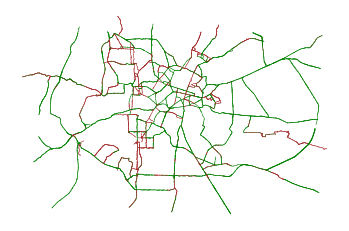

In [9]:
data = pandas.read_csv("file16_33_08.csv",converters={'Lat': eval,'Long':eval}) 
# Preview the first 5 lines of the loaded data 
# data
lats=data["Lat"].tolist()
# data['Lat']= pandas.eval(data['Lat'])
# lats=list(lats.values.flatten())
# lats=lats.astype(str).values.tolist()

longs=data["Long"].tolist()
sus=data["SU"].tolist()
# lats=literal_eval(lats)

# df['list'] = pd.eval(df['list'])

# lats
fig=plt.figure()
# plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = 'black'
#plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
plt.grid(False)
print(len(lats))
for i in range(0,len(lats)):
    if(sus[i]<15):
        plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
    else:
        plt.plot(longs[i],lats[i], c='green',linewidth=0.5)
#print(i)
#plt.xlim(-77.055,-77.015)
#plt.ylim(38.885,38.91)
plt.axis('off')
# plt.show()
timeStr=getTime()
saveFileName="traffic_data"+timeStr+".png"
plt.savefig('img'+timeStr+'.png')

In [194]:
# fig=plt.figure()
# # plt.style.use('dark_background')
# plt.rcParams['axes.facecolor'] = 'black'
# #plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
# plt.grid(False)
# for i in range(0,len(lats)):
# #     if(sus[i]/ffs[i]<0.25):
# #         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
#     if(sus[i]<15):
#         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
# #     elif(sus[i]/ffs[i]<0.5):
# #         plt.plot(longs[i],lats[i], c='red',linewidth=0.5)
# #     elif(sus[i]/ffs[i]<0.75):
# #         plt.plot(longs[i],lats[i], c='yellow',linewidth=0.5)
#     else:
#         plt.plot(longs[i],lats[i], c='green',linewidth=0.5)
# #print(i)
# #plt.xlim(-77.055,-77.015)
# #plt.ylim(38.885,38.91)
# plt.axis('off')
# plt.show()
# # timeStr=getTime()
# # saveFileName="traffic_data"+timeStr+".png"
# # plt.savefig('books_read'+timeStr+'.png')

In [206]:
# lats
